# NEOPRENE notebooks

***

This notebook is part of a notebook collection available at the [NEOPRENE Project Site](https://github.com/IHCantabria/NEOPRENE) for illustration, reproducibility and reusability purposes. This notebook is licensed under the [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).

![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Calibrating and synthetic simulations of Rainfall with the STNSRPM.


In this script we calibrate the STNSRPM (Spatio Temporal Neyman Scott Rectangular Pulse Model) using several rainfall series from Tenerife Island with a semi-arid climate (BSh-BSk). The calibration parameters are used to simulate several decades of synthetic rainfall data which can be very useful for rainfall extreme analysis or disaggregation purposes, among other things.

The script also contains:

1. a validation section where the observed series are compared with the simulated ones in terms of their statistics and exceedance probabilities. 

2. a disaggregation function to disaggreate daily to hourly rainfall data.

### Load packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import sys
sys.path.insert(1, '/home/javi/Projects/NEOPRENE_IH/NEOPRENE/NEOPRENE/')

In [8]:
from STNSRP.HiperParams import Calibration as Calhps, Simulation as Simhps
from STNSRP.Statistics import Statistics
from STNSRP.utils import compare_statistics, exceedence_probability, disaggregate_rainfall
from STNSRP.Calibration import Calibration
#from NSRP.Simulation import Simulation
#from NSRP.utils import compare_statistics, exceedence_probability#, disaggregate_rainfall

In [9]:
import warnings
warnings.filterwarnings('ignore')

### Loading daily rainfall for Tenerife Island (now for Sierra Nevada)

In [10]:
path_1 = '/home/javi/Projects/Sierra_Nevada/SierraNevada/Results/'

In [11]:
## Loading rainfall series
Series_SN = pd.read_csv(path_1 + 'DailyGuadalfeo.csv', index_col=0, parse_dates=True)
Series_SN[Series_SN.values<0]=np.nan
Input_Series=Series_SN.copy()
del Series_SN

In [12]:
## Loading attributes for the series
Attributes_SN = pd.read_csv(path_1 + 'AtributosGuadalfeo_JAVI.csv', index_col=0)
Input_Attr=pd.DataFrame()
Input_Attr['ID']=[str(i) for i in Attributes_SN.field_1.values]
Input_Attr['X']=Attributes_SN.Long.values
Input_Attr['Y']=Attributes_SN.Lat.values
Input_Attr['Elevation']=Attributes_SN.field_4.values
del Attributes_SN

In [13]:
## Shorting ID series to match with Input_Attr
Input_Series = Input_Series[Input_Attr.ID]

In [14]:
## Quitar esto. Por ahora selecciono únicamente 5 estaciones para que no tarde tanto
Input_Series = Input_Series.iloc[: , 0:5]
Input_Attr = Input_Attr.head(5)

### Plotting rainfall series, seasonality and gauge position

Text(0, 0.5, 'mm/month')

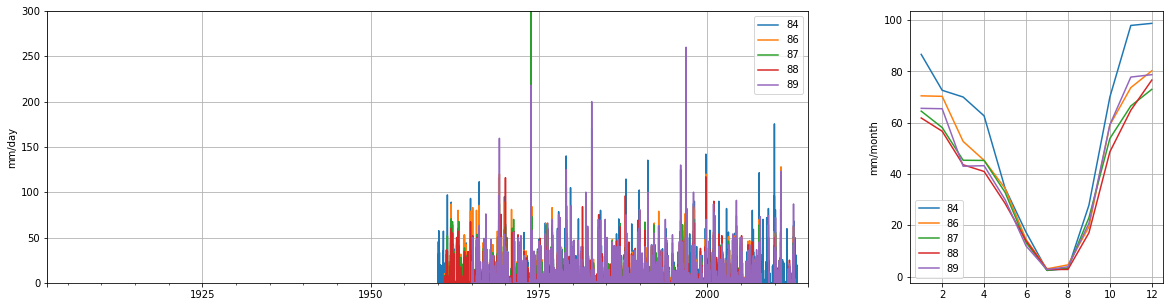

In [15]:
f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(20, 5))

t1=str(Input_Series.index.year[0]); t2=str(Input_Series.index.year[-1])
Input_Series.plot(xlim=(t1, t2),  ylim=(0, 300), ax = ax0)
ax0.grid(True)
ax0.set_ylabel('mm/day')

grouped_m = Input_Series.groupby(lambda x: x.month)
Month_sum=grouped_m.sum()*24/(len(Input_Series>=0)/30)
Month_sum.plot(ax = ax1)
ax1.grid(True)
ax1.set_ylabel('mm/month')

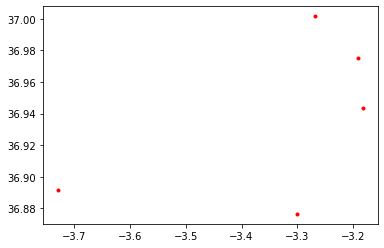

In [16]:
plt.plot(Input_Attr.X, Input_Attr.Y, '.r')

### Calibration

The input calibration file ([Input_Cal_Bilbao.yml](https://github.com/navass11/STNSRPM/blob/Javi/notebooks/Input_Cal_Bilbao.yml)) contains the hyperparameters to calibrate the model. Input rainfall statistics can be directly calculated by the software from a time series or can be introduced from a file with the statistics (both options are shown in the present notebook).

Here we breifly explain the hyperparamters available in the calibration file ([Input_Cal_Bilbao.yml](https://github.com/navass11/STNSRPM/blob/Javi/notebooks/Input_Cal_Bilbao.yml)):

- **Seasonality_type** : The model is calibrating *n* times, one for every season of the year.
        user_defined: ...\
        annual: ...\
        seasonal: ...\
        monthly: ...\

- **Seasonality_user** : When the hyperparameter "Seasonality_type" takes the argumen "user_defined"...
        user_defined: ['(1, 2, 3, 4, 5, 6)','(7, 8, 9, 10, 11, 12)']

- **temporal_resolution** : 
         d:...\
         h: 

- **process**:
        normal:...\
        storms:...

- **statistics_name**:

- **weights**:

- **number_iterations**:

- **number_bees**:

- **time_between_storms**: include unids

- **number_storm_cells**:

- **cell_duration**:  

- **cell_intensity**: 

- **storm_cell_displacement**: 

- **number_initializations**:

In [17]:
# Reading hiperparamteres for the calibration
hiper_params_cal = Calhps('./Input_Cal_SN.yml')

In [18]:
# Input statistics calculated from several Rainfall series
statistics_model_1 = Statistics(hiper_params_cal, time_series = Input_Series, attributes = Input_Attr)

# Input statistics from file 
#statistics_model_2 = Statistics(hiper_params_cal, file = 'auxiliary-materials/statististics_Bilbao.csv')

        Corr     dist
0          1        0
1   0.716897  48.5135
2   0.735883  48.7078
3   0.558456  38.0608
4   0.720562  42.6108
5   0.716897  48.5135
6          1        0
7   0.714393  3.62597
8   0.522131  14.5848
9   0.743281  7.38759
10  0.735883  48.7078
11  0.714393  3.62597
12         1        0
13  0.595567  12.7421
14  0.637547  9.92972
15  0.558456  38.0608
16  0.522131  14.5848
17  0.595567  12.7421
18         1        0
19  0.520075  14.1782
20  0.720562  42.6108
21  0.743281  7.38759
22  0.637547  9.92972
23  0.520075  14.1782
24         1        0
        Corr       dist
0   1.000000   0.000000
1   0.743281   7.387591
2   0.558456  38.060771
3   0.735883  48.707799
4   1.000000   0.000000
5   0.637547   9.929717
6   0.720562  42.610769
7   0.520075  14.178190
8   0.522131  14.584789
9   0.714393   3.625971
10  1.000000   0.000000
11  0.716897  48.513488
12  0.595567  12.742092
        Corr     dist
0          1        0
1   0.511132  48.5135
2   0.555833  48.7078
3   

In [19]:
statistics_model_1.crosscorr_dataframe

{'crosscorr_1': {(1,
   2,
   3):         dist  cross_corr
  0   2.435390    0.786541
  1   7.306170    0.659228
  2  12.176950    0.636716
  3  17.047730    0.632735
  4  21.918509    0.632031
  5  26.789289    0.631907
  6  31.660069    0.631885
  7  36.530849    0.631881
  8  41.401629    0.631880
  9  46.272409    0.631880,
  (4,
   5,
   6):         dist  cross_corr
  0   2.435390    0.785231
  1   7.306170    0.593806
  2  12.176950    0.531414
  3  17.047730    0.511078
  4  21.918509    0.504449
  5  26.789289    0.502289
  6  31.660069    0.501585
  7  36.530849    0.501355
  8  41.401629    0.501281
  9  46.272409    0.501256,
  (7,
   8,
   9):         dist  cross_corr
  0   2.435390    0.757110
  1   7.306170    0.552278
  2  12.176950    0.492405
  3  17.047730    0.474905
  4  21.918509    0.469789
  5  26.789289    0.468294
  6  31.660069    0.467857
  7  36.530849    0.467729
  8  41.401629    0.467692
  9  46.272409    0.467681,
  (10,
   11,
   12):         dist  cros

In [20]:
CAL              = Calibration(hiper_params_cal) 
CAL1             = CAL(statistics_model_1, verbose=True)

#CAL1.save_files('./CAL3/')#save python objects

[20, 1000]


################################################################################
Adjustment of parameters using the Particle Swarm Optimization (PSO)



Fitting the months = (1, 2, 3)

Initialization number  = 0
Initial best position  5.627679394672566 [5.51764676e-02 8.25734901e+01 2.28940504e+01 9.36440336e-01
 8.55018116e+00]
Iteration number  = 0
Total error = 5.627679394672566
Iteration number  = 1
Total error = 5.627679394672566
Iteration number  = 2
Total error = 5.001782245624562

Fitting the months = (4, 5, 6)

Initialization number  = 0
Initial best position  7.21058641823802 [ 0.04572525 20.20174213 44.46810704  1.44716394  1.64657671]
Iteration number  = 0
Total error = 7.21058641823802
Iteration number  = 1
Total error = 7.21058641823802
Iteration number  = 2
Total error = 4.643646159437641

Fitting the months = (7, 8, 9)

Initialization number  = 0
Initial best position  27.18997286330884 [9.30724531e-02 1.80273953e+01 9.85330542e+01 1.33806761e+00
 8.6094980

In [21]:
CAL1.statististics_Fit

,"(1, 2, 3)","(4, 5, 6)","(7, 8, 9)","(10, 11, 12)"
var_1,2.641949,2.336083,5.486031,4.230298
var_2,2.301285,1.858628,4.303166,3.625208
var_3,2.071562,1.612866,3.691294,3.217652
var_4,1.895922,1.447713,3.285691,2.914365
autocorr_1_1,0.517477,0.266013,0.230523,0.468770
autocorr_2_1,0.231729,0.112999,0.076245,0.165907
autocorr_3_1,0.103966,0.048366,0.025577,0.058835
fih_1,0.717468,0.618238,0.916838,0.880220
fiWW_1,0.812852,0.720607,0.597133,0.776541
fiDD_1,0.926303,0.827475,0.963458,0.969592


In [22]:
CAL1.statististics_Real[(7, 8, 9)].mean(axis=1)

var_1            7.944562
var_2            5.984352
var_3            5.057372
var_4            4.607689
autocorr_1_1     0.162871
autocorr_2_1     0.096735
autocorr_3_1     0.024484
fih_1            0.953418
fiWW_1           0.345910
fiDD_1           0.969156
M3_1            13.321481
dtype: float64

In [23]:
statistics_model_1.crosscorr_dataframe

{'crosscorr_1': {(1,
   2,
   3):         dist  cross_corr
  0   2.435390    0.849796
  1   7.306170    0.849796
  2  12.176950    0.849796
  3  17.047730    0.849796
  4  21.918509    0.849796
  5  26.789289    0.849796
  6  31.660069    0.849796
  7  36.530849    0.849796
  8  41.401629    0.849796
  9  46.272409    0.849796,
  (4,
   5,
   6):         dist  cross_corr
  0   2.435390    0.713862
  1   7.306170    0.535530
  2  12.176950    0.474421
  3  17.047730    0.454955
  4  21.918509    0.448946
  5  26.789289    0.447128
  6  31.660069    0.446587
  7  36.530849    0.446427
  8  41.401629    0.446381
  9  46.272409    0.446368,
  (7,
   8,
   9):         dist  cross_corr
  0   2.435390    0.440112
  1   7.306170    0.440112
  2  12.176950    0.440112
  3  17.047730    0.440112
  4  21.918509    0.440112
  5  26.789289    0.440112
  6  31.660069    0.440112
  7  36.530849    0.440112
  8  41.401629    0.440112
  9  46.272409    0.440112,
  (10,
   11,
   12):         dist  cros

In [24]:
CAL1.crosscorr_Fit

{'crosscorr_1': {(1,
   2,
   3):         dist  cross_corr
  0   2.435390    0.849796
  1   7.306170    0.849796
  2  12.176950    0.849796
  3  17.047730    0.849796
  4  21.918509    0.849796
  5  26.789289    0.849796
  6  31.660069    0.849796
  7  36.530849    0.849796
  8  41.401629    0.849796
  9  46.272409    0.849796,
  (4,
   5,
   6):         dist  cross_corr
  0   2.435390    0.713862
  1   7.306170    0.535530
  2  12.176950    0.474421
  3  17.047730    0.454955
  4  21.918509    0.448946
  5  26.789289    0.447128
  6  31.660069    0.446587
  7  36.530849    0.446427
  8  41.401629    0.446381
  9  46.272409    0.446368,
  (7,
   8,
   9):         dist  cross_corr
  0   2.435390    0.440112
  1   7.306170    0.440112
  2  12.176950    0.440112
  3  17.047730    0.440112
  4  21.918509    0.440112
  5  26.789289    0.440112
  6  31.660069    0.440112
  7  36.530849    0.440112
  8  41.401629    0.440112
  9  46.272409    0.440112,
  (10,
   11,
   12):         dist  cros

In [25]:
statistics_model_1.statististics_dataframe[gauge]

AttributeError: 'Statistics' object has no attribute 'statististics_dataframe'

### Simulation

The input simulation file ([Input_Sim_Bilbao.yml](https://github.com/navass11/STNSRPM/blob/Javi/notebooks/Input_Sim_Bilbao.yml)) contains the hypermarametes for rainfall simulation.

Here we breifly explain the hyperparamters available in the simulation file [Input_Sim_Bilbao.yml](https://github.com/navass11/STNSRPM/blob/Javi/notebooks/Input_Sim_Bilbao.yml) are described bellow:

- **Seasonality_type**:

- **Seasonality_user**:  

- **statistics_name**:

- **temporal_resolution**:

- **process**:

- **year_ini**:

- **year_fin**: 


In [ ]:
# Reading hiperparamteres for the simulation
hiper_params_sim = Simhps('./Input_Sim_Bilbao.yml')

In [ ]:
SIM              = Simulation(hiper_params_sim) 

# Input parameters from the model
SIM1             = SIM(params_cal = CAL1)

# Input parameters from a dataframe
#SIM2             = SIM(params_cal = './CAL2/Calibrated_parameters.csv')

SIM1.save_files('./SIM1/')
#SIM2.save_files('./SIM2/')

### Validation

In [ ]:
# Comparing the values of the statistcs (observed, fitted and simulated).
compare_statistics(CAL1, SIM1)

In [ ]:
# Comparing exceedence Probability betwen Observed and Simulated series
exceedence_probability(Input_Serie, SIM1.Daily_Simulation, SIM1.temporal_resolution)

### Disaggregation (daily-to-hourly)

Disaggregation process might take some minutes to dissagregate several decades of data. Here we select only 5 year as an example

In [ ]:
# Peiod selected from the input (onserved) serie
year1 = 2000; year2 = 2005
x_series = Input_Serie[(Input_Serie.index.year >= year1) & (Input_Serie.index.year < year2)]

In [ ]:
# Defining hourly synthetic serie
y_series=SIM1.Hourly_Simulation.copy()

In [ ]:
# Daily-to-hourly disaggregation
hourly_disaggregation = disaggregate_rainfall(x_series, y_series)

In [ ]:
# Resampling hourly disaggregated serie to daily one
daily_disaggregation = hourly_disaggregation.resample('D').agg(pd.Series.sum, min_count=1)
# Calculating statistics from the disaggregated daily resample serie and for the period selected from the Input serie
statistics_model_3 = Statistics(hiper_params_cal, time_series = x_series)
statistics_disaggregated = Statistics(hiper_params_cal, time_series = daily_disaggregation)

In [ ]:
# Comparing daily observed statiscis with dialy dissagregated ones
statistics_model_3.statististics_dataframe.compare(statistics_disaggregated.statististics_dataframe)

In [ ]:
# Plotting observed daily series and disaggregated ones (daily and horly) for a specific period
t1 = str(year1) + '/02/01'; t2 = str(year1) + '/02/28'
f = x_series.plot(xlim=(t1, t2),  ylim=(0, 20), color = 'b', style= '-', linewidth = '3', figsize = (20, 5))
l = daily_disaggregation.plot(xlim=(t1, t2),  ylim=(0, 20), color = 'r', style = '--', ax = f)
hourly_disaggregation.plot(xlim=(t1, t2),  ylim=(0, 20), color = 'g', style = '--o', ax = f)
plt.legend(['Obs. (daily)', 'Disagg. (daily)', 'Disagg. (hourly)'], fontsize = 15)
plt.grid(True)
plt.tick_params(axis = 'both', labelsize = 15)
plt.ylabel('mm/day', fontsize = 15)

# Example number 2

### Loading hourly rainfall data for Sevilleta

In [ ]:
Serie_Sevilleta=pd.read_csv('auxiliary-materials/Sevilleta_Hourly.csv', sep=",", decimal=".", index_col=0, parse_dates = True)
Serie_Sevilleta[Serie_Sevilleta.values<0]=np.nan
Input_Serie=pd.DataFrame(index=Serie_Sevilleta.index)
Input_Serie['Rain']=Serie_Sevilleta.values

### Plotting hourly data and seasonality

In [ ]:
f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(20, 5))

t1=str(Input_Serie.index.year[0]); t2=str(Input_Serie.index.year[-1])
Input_Serie.plot(xlim=(t1, t2),  ylim=(0, 20), ax = ax0)
ax0.grid(True)
ax0.set_ylabel('mm/hour')

grouped_m = Input_Serie.groupby(lambda x: x.month)
Month_sum=grouped_m.sum()*24/(len(Input_Serie>=0)/30)
Month_sum.plot(ax = ax1)
ax1.grid(True)
ax1.set_ylabel('mm/month')

### Calibration

In [ ]:
hiper_params_cal = Calhps('./Input_Cal_Sevilleta.yml')
statistics_model_1 = Statistics(hiper_params_cal, time_series = Input_Serie)

In [ ]:
CAL              = Calibration(hiper_params_cal) 
CAL1             = CAL(statistics_model_1, verbose=False)

CAL1.save_files('./CAL1/')

### Simulation

In [ ]:
hiper_params_sim = Simhps('./Input_Sim_Sevilleta.yml')

SIM              = Simulation(hiper_params_sim) 
SIM1             = SIM(params_cal = CAL1)
#SIM2             = SIM(params_cal = './CAL2/Calibrated_parameters.csv')

In [ ]:
SIM1.save_files('./SIM1/')

### Validation

In [ ]:
# Comparing the values of the statistcs (observed, fitted and simulated).
compare_statistics(CAL1, SIM1)

In [ ]:
# Comparing exceedence Probability betwen Observed and Simulated series
exceedence_probability(Input_Serie, SIM1.Hourly_Simulation, SIM1.temporal_resolution)

## Session info

In [ ]:
!conda list